# <b>1 <span style='color:#0386f7de'>|</span> Introduction</b>
Most people start working with data from exactly the wrong end. They begin with
a data set, then apply their favorite tools and techniques to it. The result is narrow
questions and shallow arguments remember <b> Why Before How </b> ,The secret is to have structure that you
can think through, rather than working in a vacuum , <b> But how to have that structure  ?</b>
-  Our first place to find structure is in creating the scope for a data problem
There are four parts to a project scope. The four parts are the <b> context </b> of the
project; the <b> needs </b> that the project is trying to meet; the <b> vision </b> of what success might
look like; and finally what the <b> outcome </b> will be

![](https://www.providesupport.com/blog/wp-content/uploads/2015/11/How-to-Tailor-Customer-Service-Based-on-Customer-Personality-Type.jpg)
### Context :
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.


### Explanation of the variables of the dataset :
#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Needs:
-  What is the customer segments properties?

### Vision :
-  the company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Outcome :
-   Companies can direct their products and save a lot of money

At the end of everything, the finished work will often be fairly simple.Because
of all of the work done in thinking about context and need, vision,
and thinking about outcomes, our work will be the right kind of simple. <b>Simple
results are the most likely to get used.</b>

# <b>2 <span style ='color:#0386f7de'>|</span> Importing Libraries</b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# <b>3 <span style ='color:#0386f7de'>|</span> Loading the data</b>

In [ ]:
df = pd.read_csv(r'../input/customer-personality-analysis/marketing_campaign.csv', delimiter='\t' , parse_dates=['Year_Birth' , 'Dt_Customer'])
df

In [ ]:
df.info()

# <b>4 <span style ='color:#0386f7de'>|</span> Cleaning the data</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.1 | Basic data cleaning</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [ ]:
counts = df.nunique()
counts

#### Insight :
#### 1 - I can see two variable(<b>Z_CostContact , Z_Revenue</b>) we don't know refers to what  ,so what to do ?
* note: they Contain a Single Value    
- Columns that have a single observation or value are probably useless for modeling. These
columns or predictors are referred to zero-variance predictors as if we measured the variance
(average value from the mean), simply drop them.

#### 2 - Always check the id nunique is equal to the rows of data , because sometimes there are duplicated ID 


In [ ]:
df.drop(['Z_CostContact' ,'Z_Revenue'] , axis = 1 , inplace=True)

- if you notice that when we transfer the year of born pandas added month and day  ,we need to fix that

In [ ]:
df['Year_Birth']=pd.DatetimeIndex(df['Year_Birth']).year

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.2 | Mark and Remove Missing Data
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px3.

In [ ]:
df.isna().sum().sort_values(ascending=False)[:10]

In [ ]:
df['Income'].fillna(value=df['Income'].median() ,inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.3 | Outlier Identification and Removal
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [ ]:
num_col = [col for col in df.columns if type(col) != 'object']
num_col

- despite that all of these columns are numerical but some of them represent categorical values so we need to pick columns based on our understanding of the data (Not a rule, just do what you think is correct)

In [ ]:
num_col_sel = ['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']


In [ ]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
       
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers  
Outliers_to_drop=detect_outliers(df,0,num_col_sel)

In [ ]:
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
df.shape

# <b>5 <span style='color :#0386f7de'>| </span>  Data Preprocessing</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.1 | Creating Features
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
df['Age'] = 2015 - df['Year_Birth'] #assuming the data was collected at 2015

df['TotalAcceptedCmp'] = df[['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']].sum(axis=1)


df['TotalPrauches'] = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis= 1) #the total number of pruchase 


df['Childrens'] = df[['Kidhome' , 'Teenhome']].sum(axis=1) #number of children that customer has

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

df['Spending']=df[[ 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].aggregate([sum] ,axis = 1) #amount of money the customer pay it

df['Savings']=df['Income'] - df['Spending'] #The amount of money the customer saves

df['Education'] = df['Education'].replace(['2n Cycle','Graduation'],'Graduate') #simplifing education
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')
df['Education'] = df['Education'].replace(['PhD','Master'], 'Post Graduate')

- i will drop ID <b> useless</b> and Year_Birth because<b> Age represnt it</b>

In [ ]:
df.drop(['ID' , 'Year_Birth' ,'Dt_Customer'  ] , axis=1 , inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.2 | Handling Categorical Data (Encoding it)
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


-  I will make a copy of the dataframe to extract form it the clustering 

In [ ]:
df_copy = df.copy()
cat_col =  [x for x in df_copy.columns if ((df_copy[x].dtype != 'int64') & (df_copy[x].dtype != 'float64'))]
df_copy=pd.get_dummies(df_copy , columns=cat_col , drop_first=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.3 | Handling Numerical Data (Normalise it)
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols =  [x for x in df_copy.columns if ~((df_copy[x].dtype != 'int64') & (df_copy[x].dtype != 'float64'))]
Scaler = StandardScaler()
df_copy[num_cols] = Scaler.fit_transform(df_copy[num_cols])

# <b>6 <span style='color :#0386f7de'>| </span>  Modeling </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6.1 | Dimensionality Reduction 
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
fig, ax = plt.subplots(figsize=(14,8))         
sns.heatmap(df_copy.corr(),
            cmap= sns.color_palette("RdPu", 10),
            ax=ax)

- so as you can see that our feature has a strong relation with each other so iam going to reduce dimension using PCA

In [ ]:
pca = PCA(n_components = 0.75)
pca.fit(df_copy)
reduced_df= pd.DataFrame(pca.transform(df_copy))

print("Current number of features= ",len(reduced_df.columns))

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6.2 | Searching for the best numbers of clustering 
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


-    <b> the elbow method </b>  is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. 

In [ ]:
plt.figure(figsize = (14,8))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(reduced_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias, "bo-" ,color= colors_nude[0])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

-  <b> silhouette score</b> is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1

In [ ]:
plt.figure(figsize = (14,8) )
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(reduced_df, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-" ,color=colors_nude[0])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

#### Insight
- so as you can see that the elbow was not sure <b> 2 or 3 </b>, but the silhouetter came and say it's <b> 2</b>

In [ ]:
clusters = KMeans(n_clusters=2, random_state=42).fit(reduced_df)
df["Personality"]= clusters.labels_

# <b>7 <span style='color :#0386f7de'>| </span> Evaluationg Models </b>


 now we need to to study the patterns in the clusters formed and determine the nature of the clusters' patterns

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>7.1 | What is the percentage of each cluster ? 
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
plt.figure(figsize = (14,8) )
plt.pie(list(df['Personality'].value_counts()),labels=['Personality 1' , 'Personality 0'],
        autopct='%.00f%%' ,colors=colors_nude, startangle=90  , explode =(0.01,0))
plt.title('The Percentage Of Each Cluster ' ,fontsize = 15)
plt.axis('equal')
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>7.2 | What is the Age Distribution of each cluster ? 
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
plt.figure(figsize = (14,8) )
sns.kdeplot(data =df, x = 'Age' , hue = 'Personality' , palette=colors_nude[:2])
plt.title('Age Distribution' ,fontsize = 15)
plt.show()

#### Insight

-  cluster 0 have a wider range of ages and has more young people
-  cluster 1 has a relatively old people

In [ ]:
clus0 = df[(df['Age'] > 40 )&(df['Personality'] == 0)]
clus1 = df[(df['Age'] > 40 )&(df['Personality'] == 1)]
print('percentage of customer more than 40 at cluster0 : {0:0.2f}%'.format(len(clus0) / len(df[df['Personality'] == 0] )))
print('percentage of customer more than 40 at cluster1 : {0:0.2f}%'.format(len(clus1) / len(df[df['Personality'] == 1])))

In [ ]:
len(df['Personality'] == 0)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>7.3 | What is the income Distribution of each cluster ? 
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
plt.figure(figsize = (14,8) )
sns.kdeplot(data =df, x = 'Income' , hue = 'Personality' ,palette=colors_nude[:2])
plt.title('Income Distribution' ,fontsize = 15)
plt.show()

#### Insight
-  cluster 1 gain more money with mean of 62,760$

-  cluster 0 gain more money with mean of 35,615$

In [ ]:
df.groupby(['Personality'])['Income'].describe()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>7.4 | What is the kids number of each cluster ? 
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Childrens' , hue = 'Personality' ,palette=colors_nude)
plt.title('Kids Distribution' ,fontsize = 15)
plt.show()

In [ ]:
kids_1 = len(df[(df['Childrens'] > 0) &(df['Personality'] == 1)]) / len(df)
kids_0 = len(df[(df['Childrens'] > 0) &(df['Personality'] == 0)]) / len(df)
print('Probability of having children at cluster 0 is {0:0.2f}%'.format(kids_0))
print('Probability of having children at cluster 1 is {0:0.2f}%'.format(kids_1))

#### Insight 
-  cluster 0 tends to have more kids

#### Related question 
Dose that affect on the spending ?

In [ ]:
plt.figure(figsize = (14,8) )
sns.boxplot(data =df, x = 'Personality' , y = 'Spending' ,palette=colors_nude[:2])
plt.title('Spending Distribution' ,fontsize = 15)
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>7.5 | What is the main product of each cluster ? 
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
plt.figure(figsize = (14,8) )
labels = ['Fruit' , 'Meat' , 'Fish' , 'Sweets' , 'Wine' , 'Gold']
for i in range(2):
    counts =[]
    d = df[df['Personality'] == i]
    counts.append(d['MntFruits'].sum())
    counts.append(d['MntMeatProducts'].sum())    
    counts.append(d['MntFishProducts'].sum())    
    counts.append(d['MntSweetProducts'].sum())    
    counts.append(d['MntWines'].sum())
    counts.append(d['MntGoldProds'].sum())
    plt.subplot(1,2,i+1)
    plt.title("Personality "+str(i))
    plt.pie(counts, labels = labels, autopct='%.0f%%' ,colors=colors_nude)
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>7.6 | What is the Education of each cluster ? 
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [ ]:
plt.figure(figsize = (14,8) )
education =['Graduate', 'Post Graduate', 'Under Graduate']
for i in range(2):
    counts =[]
    d = df[df['Personality'] == i]
    counts.append(len(d[d['Education'] == 'Graduate']))
    counts.append(len(d[d['Education'] == 'Post Graduate']))    
    counts.append(len(d[d['Education'] == 'Under Graduate']))    
    plt.subplot(1,2,i+1)
    plt.title("Personality "+str(i))
    plt.pie(counts, labels = education, autopct='%.0f%%' ,colors=colors_nude)
plt.show()

-  cluster0 has more educational people with 51% are master and Phd , on the other hand cluster1 has only 36%

# <b>8 <span style='color :#0386f7de'>| </span> Summary </b>


We finally reached the end of the analysis. Here is a summary of the main features of each customer segment/personality

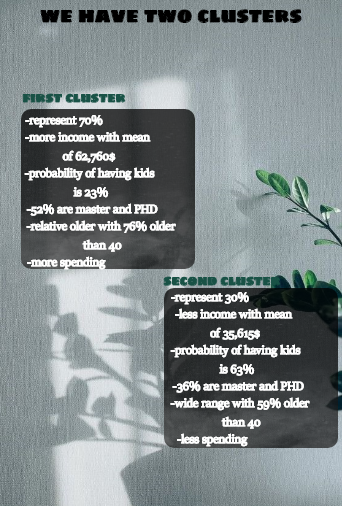